<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-MatheusGarvao/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Aula01_Introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução à Visão Computacional e Computação Gráfica

### 🎯 Objetivos da Aula
- Compreender o que é Visão Computacional.
- Diferenciar Visão Computacional, Processamento de Imagens e Computação Gráfica.
- Realizar manipulações simples com imagens.
- Explorar conceitos de pixels, resoluções e canais de cor.


## O que é Visão Computacional?

A **Visão Computacional** é uma área da Inteligência Artificial que busca permitir que os computadores 'vejam' e interpretem o mundo visual, assim como os humanos.

Ela utiliza imagens e vídeos como entrada e tenta extrair informações úteis, como:
- Detecção de objetos
- Reconhecimento facial
- Segmentação de imagem
- Rastreamento de movimento

A **Computação Gráfica**, por outro lado, está mais voltada à geração de imagens — como renderizar cenas em 3D.

Já o **Processamento de Imagens** se concentra na transformação e análise de imagens (normalmente 2D) para melhorar a qualidade ou extrair características.

| Área                  | Foco                             |
|-----------------------|----------------------------------|
| Visão Computacional   | Entendimento e interpretação     |
| Computação Gráfica    | Geração de imagens               |
| Processamento de Imagens | Manipulação e melhoria de imagens |


In [1]:
# Importação das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exibir gráficos inline
%matplotlib inline


## Exemplo prático: Carregar e visualizar uma imagem

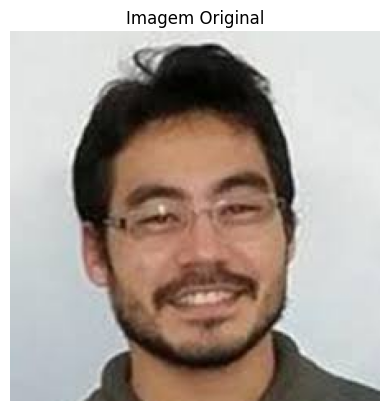

In [22]:
# Carregar imagem de exemplo
from PIL import Image
import requests

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEdEoDilNtU84cn4DIFuRq22nie5kv4VuNRg&s"
image = Image.open(requests.get(url, stream=True).raw)
image = image.convert("RGB")  # Garante 3 canais

# Mostrar imagem
plt.imshow(image)
plt.title("Imagem Original")
plt.axis('off')
plt.show()


## Manipulação dos canais RGB

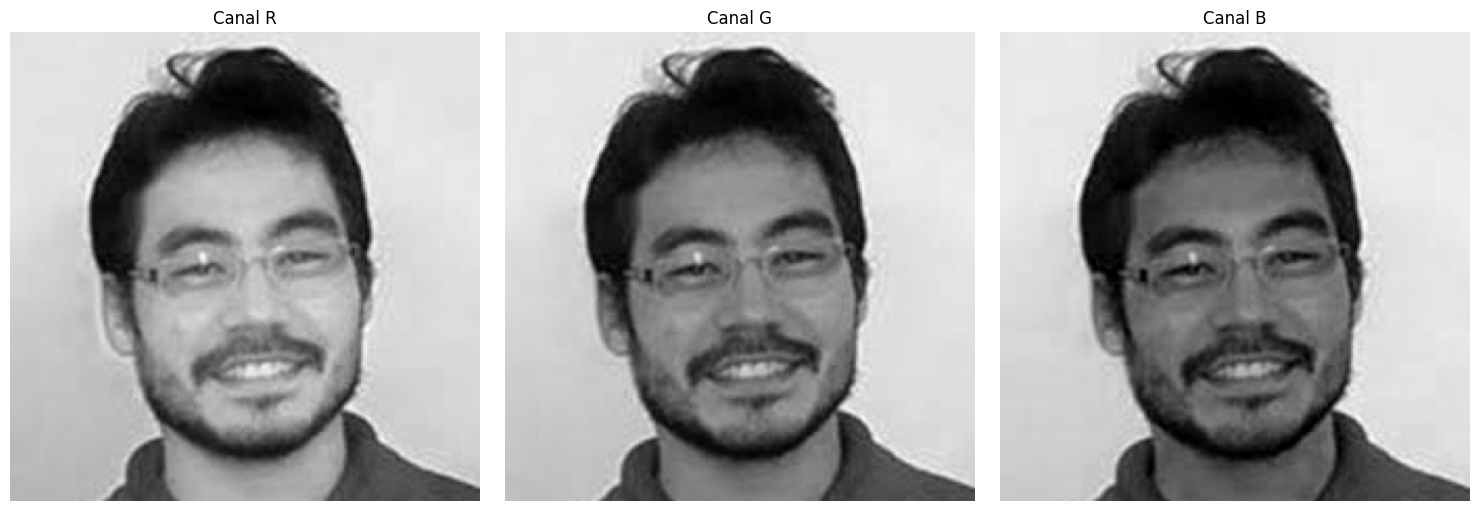

In [23]:
r, g, b = image.split()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, channel, color in zip(axs, [r, g, b], ['R', 'G', 'B']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'Canal {color}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conversão para escala de cinza

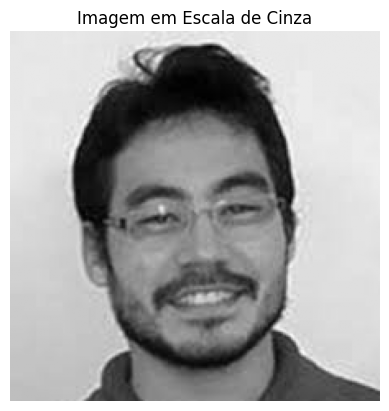

In [24]:
gray_image = image.convert("L")

plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


## Explorando os pixels

In [25]:
np_image = np.array(image)
print("Formato da imagem:", np_image.shape)
print("Valor do pixel (0, 0):", np_image[0, 0])


Formato da imagem: (225, 225, 3)
Valor do pixel (0, 0): [225 227 226]


## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!


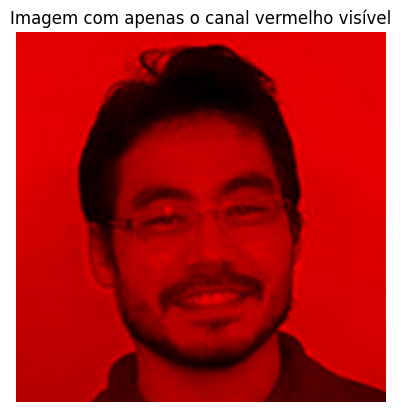

In [26]:
zero_channel = Image.new("L", r.size, 0)
image_red = Image.merge("RGB", (r, zero_channel, zero_channel))

plt.imshow(image_red)
plt.title("Imagem com apenas o canal vermelho visível")
plt.axis('off')
plt.show()


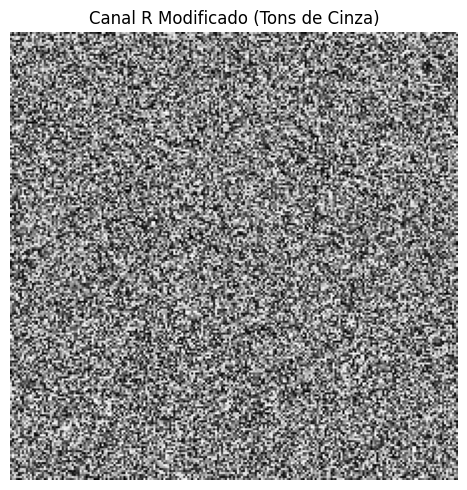

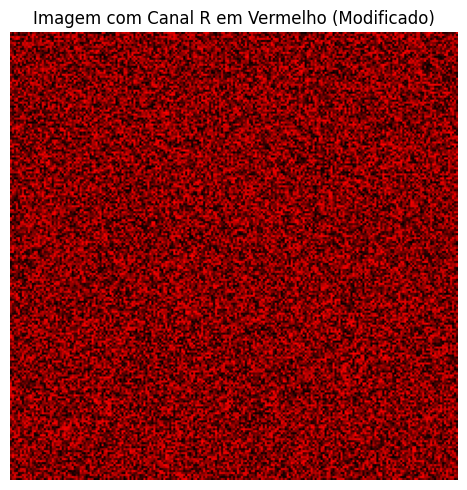

In [27]:
import random

pixels = r.load()
width, height = r.size

for y in range(height):
    for x in range(width):
        new_value = random.randint(0, 255)
        pixels[x, y] = new_value

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(r, cmap='gray')
ax.set_title('Canal R Modificado (Tons de Cinza)')
ax.axis('off')
plt.tight_layout()
plt.show()

zero_channel = Image.new("L", r.size, 0)
image_red_only = Image.merge("RGB", (r, zero_channel, zero_channel))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(image_red_only)
ax.set_title('Imagem com Canal R em Vermelho (Modificado)')
ax.axis('off')
plt.tight_layout()
plt.show()


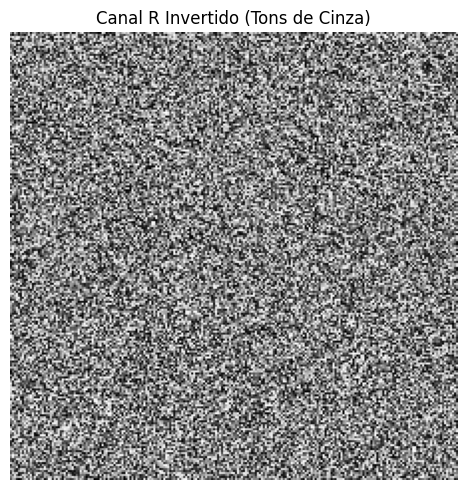

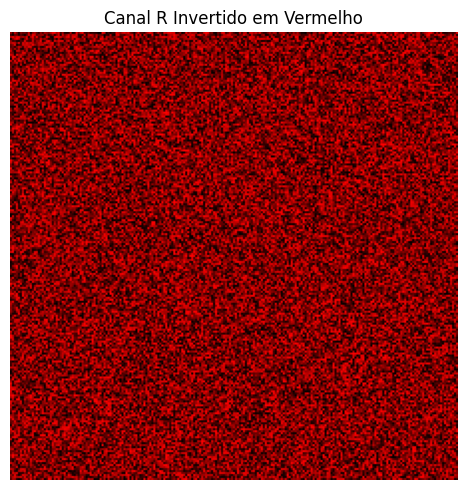

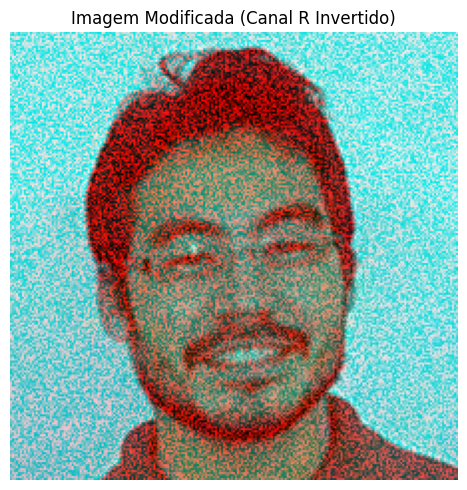

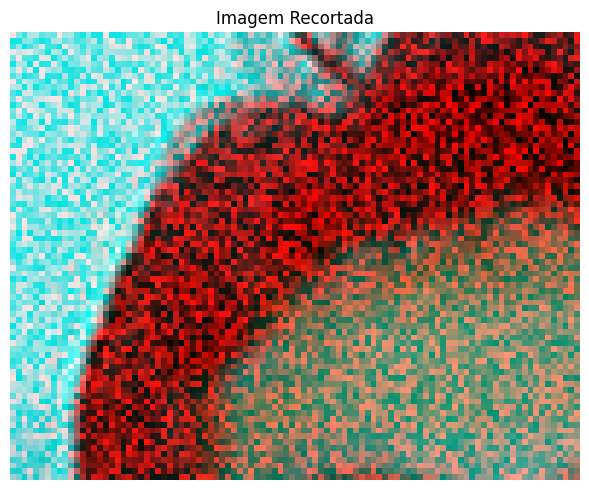

In [29]:
pixels = r.load()
width, height = r.size

for y in range(height):
    for x in range(width):
        current_value = pixels[x, y]
        inverted_value = 255 - current_value
        pixels[x, y] = inverted_value

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(r, cmap='gray')
ax.set_title('Canal R Invertido (Tons de Cinza)')
ax.axis('off')
plt.tight_layout()
plt.show()

zero_channel = Image.new("L", r.size, 0)
image_red_only = Image.merge("RGB", (r, zero_channel, zero_channel))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(image_red_only)
ax.set_title('Canal R Invertido em Vermelho')
ax.axis('off')
plt.tight_layout()
plt.show()

image_modified = Image.merge("RGB", (r, g, b))
image_modified.save('imagem_modificada.jpg')

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(image_modified)
ax.set_title('Imagem Modificada (Canal R Invertido)')
ax.axis('off')
plt.tight_layout()
plt.show()

crop_width = random.randint(50, width // 2)
crop_height = random.randint(50, height // 2)

left = random.randint(0, width - crop_width)
top = random.randint(0, height - crop_height)

right = left + crop_width
bottom = top + crop_height

cropped_image = image_modified.crop((left, top, right, bottom))
cropped_image.save('imagem_recortada.jpg')

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.imshow(cropped_image)
ax.set_title('Imagem Recortada')
ax.axis('off')
plt.tight_layout()
plt.show()
